In [1]:
import numpy as np
import casadi as ca
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML
from MPC_Animation_Demo_Functions import *
from global_path_planning import *

# Define Problem
dt = 0.1
x_init = np.array([0, 0, 0, 0])
x_target = np.array([50, 50, 0, 0])

# Constraints 
pos_constraints = [0, 50, 0, 50]         # [x_min, x_mplt, y_min, y_mplt]
vel_constraints = [-5, 5, -5, 5]         # [x_min, x_mplt, y_min, y_mplt]
acc_constraints = [-5, 5, -5, 5]         # [x_min, x_mplt, y_min, y_mplt]

# Time Horizon
N = 10
T = 120

# List of obstacles : obstacle = [center_x, center_y, radius]
obstacles = [[20, 40, 2], [35, 30, 3], [10, 10, 2], [25, 15, 10], [20, 30, 4], [40, 40, 5], [29, 39, 1]]

# Simulate the result
vehicle = vehicle_SS(dt)

# Setup controller function
controller = lambda x_init : mpc_control(vehicle, N, x_init, x_target, pos_constraints, vel_constraints, acc_constraints, obstacles)


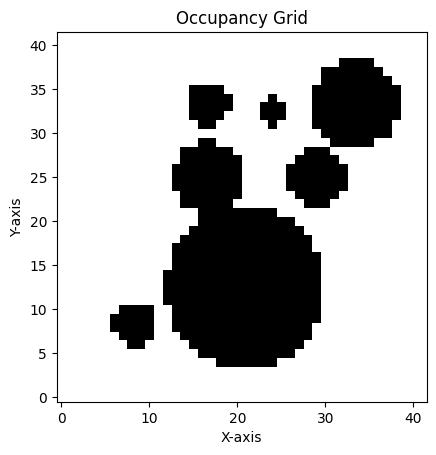

A*


IntProgress(value=0, max=1280)

Goal found
RRT*


IntProgress(value=0, max=1000)

Goal found


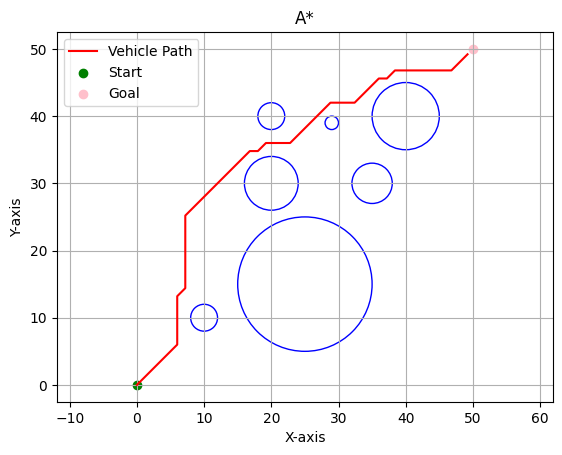

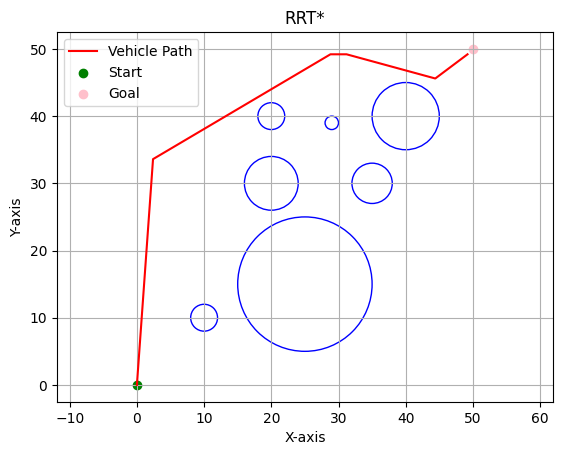

In [2]:
#get global a_star path and visualize
occupancy_grid = OccupancyGrid(1.2, [0, 0], obstacles, [50, 50], obstacle_margin=.4)
occupancy_grid.plot()

start = [0, 0]
goal = [50, 50]

print("A*")
path_astar = a_star(occupancy_grid, start, goal)
print("RRT*")
path_rrt = rrt_star(occupancy_grid, start, goal, radius=5, max_iter=1000)

path_astar.plot()
path_rrt.plot()


In [ ]:
%%capture
# Simulate drone
states, inputs, plans, timesteps = simulate(dt, T, x_init, N, controller, num_states=4, num_inputs=2)

In [ ]:
def update(frame):
    # Clear previous frame
    plt.cla()
    
    # Plot Path for current state
    plt.scatter(plans[0][:, frame], plans[1][:, frame], c='g', s=20, label = "Planned Trajectory")

    # Plot current state
    drone = plt.Circle((states[0][frame], states[1][frame]), 0.7, color='r', fill=True, label = "Drone")
    plt.gca().add_patch(drone)
    
    for obstacle in obstacles:
        circle = plt.Circle((obstacle[0], obstacle[1]), obstacle[2], color='k', fill=False)
        plt.gca().add_patch(circle) 

    plt.legend()
    plt.title(f'Time Step {frame + 1}/{len(states[1])}')  # Set title for each frame
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.xlim(0, 50)
    plt.ylim(0, 50)
    plt.grid()


In [ ]:
# Create the animation
fig = plt.figure()
ani = FuncAnimation(fig, update, frames=np.shape(states)[1]-1, interval=100)

# Display the animation within the Jupyter Notebook using HTML
HTML(ani.to_jshtml())